# IMPLEMENTATION OF THE CANNY EDGE DETECTION ALGORITHM.

# Importing neccessary Libraries.

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
from scipy import ndimage
from PIL import Image
import glob
import os

# Read All Test Images into a List at once.

In [36]:
path = '/home/beltus/image/Gray'; # Gray image folder path
path2 = '/home/beltus/image/Blur'; #Gaussina blur image folder path
path3 = '/home/beltus/image/Sobel'; #Path to folder containing the x and y derivatives of the images
path4 = '/home/beltus/image/Non_max'; # Non-maximum suppression images folder path
path5  = '/home/beltus/image/Double_threshold'; #Double_thresholded image folder path
path6 = '/home/beltus/image/Canny'; # Final Canny Edge detected output images
path7 = '/home/beltus/image/Real_Canny'; # Final Canny Edge detected output images



# Load Images

In [49]:
image_list = [cv2.imread(item) for i in [glob.glob('/home/beltus/Documents/Image Processing/Home_work/images/*.%s' % ext) for ext in ["jpg","gif","png","tga"]] for item in i]

# Displaying all Test Images.

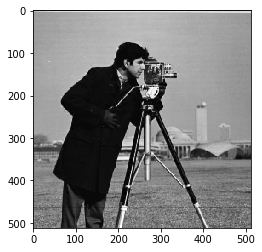

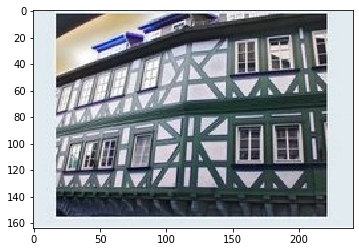

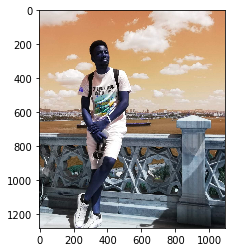

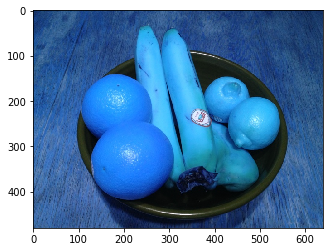

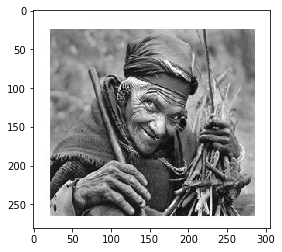

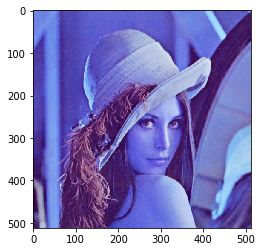

In [50]:
for img in image_list:
    plt.figure(), plt.imshow(img)

# Convert RGB Color Images to Gray Scale Before Any Operation is Done.

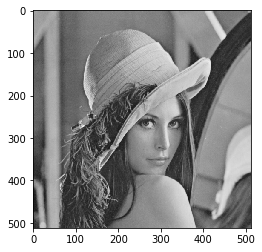

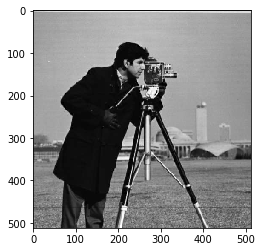

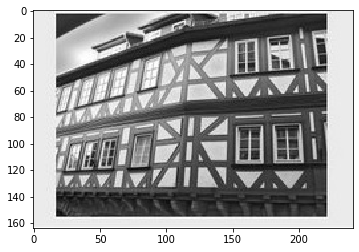

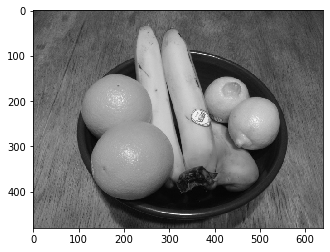

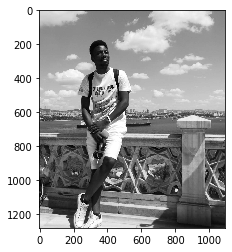

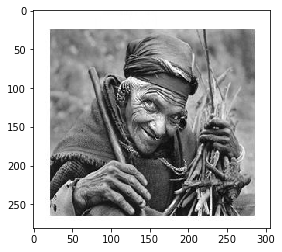

In [51]:
gray_images = []; # List to hold all the Gray scale images

for i in range(len(image_list)):
        im = cv2.cvtColor(image_list[i], cv2.COLOR_BGR2GRAY);  # Convert all images to grayscale using opencv 
        gray_images.append(im) ; 
        cv2.imwrite(os.path.join(path , 'Gray' + str(i) + '.jpg') , im); # saves the images in Gray Folder.
        #cv2.imwrite('gray' + str(i) + '.jpg' , im )
        
for img in glob.glob(path + str('/*.jpg')):
    plt.figure() , plt.imshow(cv2.imread(img))        
       

# Function For Kernel Flip Before Performing Convolutions.

In [39]:
#Kernel Flip

#Function to flip Kernel

def kenel_flip(kernel):
    
    k_new = np.zeros(kernel.shape); # creates a matrix of same size as the input, then initializes the matrix to all zeros 
    
    x = kernel.shape[0];
    y = kernel.shape[1];
    
    for i in range(x):
        for j in range(y):
                
                k_new[i][j] = kernel[x-i-1][y-j-1];# New matrix which is the flipped horizontally and vertically
                                                    # 1 is subtracted to ensure the dimensions are equal ( x=3)
                
    return k_new;
                
              
            
    

# Image Convolution Operation

In [5]:
# Convolution operation


def image_convolution(image , kernel):
    
    img_conv = np.zeros(image.shape); #Output image initialized to a 2D matrix of all zeros
    h = image.shape[0]; #get height of image
    w = image.shape[1];#get the width of the image
    
    kh = kernel.shape[0];#get the height  of the kernel
    kw = kernel.shape[1];#get the width of the kernel
    
    s = kh //2 ; # s and t value use for padding
    t = kw // 2;
    
    for i in range(s , h - s): # begin the convolution at the pixel that centres perfectly with kernel
        for j in range(t , w - t):
            sum = 0 ; 
                
            for m in range(kh): # 
                for n in range(kw):
                    
                    sum  = sum + kernel[m][n] * image[i - s + m ][j - t + n]; # perform one by one multiplication of each pixel
                                                                            # with the corresponding kernel value and sum to get the result
                    
            img_conv[i][j] = sum ;# results of each convolution or kernel slide operation is assigned to the output image
            
    return img_conv;
            


# Smoothing Using Gaussian Blur Filter.

In [54]:


#Normalize Gaussian Kernel.

def gaussian_blur( image , kernel):
    
     img_blur = image_convolution(image , kernel); # Convolves the kernel with the image using the image_convolution method above
     
     return img_blur;

## Gaussian kernel that was used.
gaussian_kernel = (1.0/57) * np.array(
        [[0, 1, 2, 1, 0],
        [1, 3, 5, 3, 1],
        [2, 5, 9, 5, 2],
        [1, 3, 5, 3, 1],
        [0, 1, 2, 1, 0]])

blur_images = [] # List to hold all the images that have been smooth.

for i in range(len(gray_images)):
    
    blur = gaussian_blur(gray_images[i], gaussian_kernel);
    
    blur_images.append(blur); # append the blured images to list.
    
    cv2.imwrite(os.path.join(path2 , 'blur' + str(i+1) + '.jpg') , blur); # Save to path specified as path.
   # plt.figure() , plt.imshow(blur);

        




# Output Images From Gaussian Blur

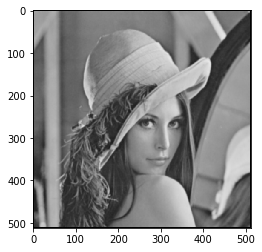

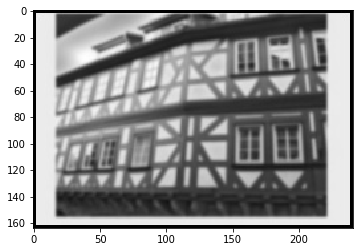

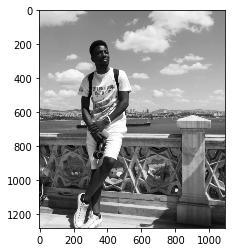

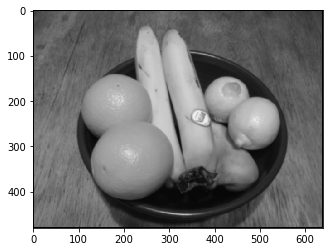

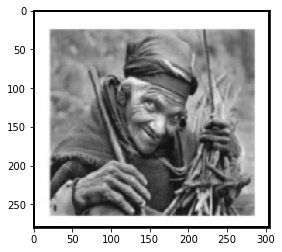

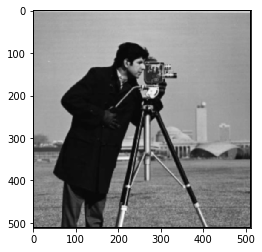

In [55]:
for img in glob.glob(path2 + str('/*.jpg')):
    plt.figure() , plt.imshow(cv2.imread(img))

# Sobel Filter Implementation.

In [56]:
# Image Gradient Implementation

# Sobel operator is used as an approximation to calculating the gradient or derivative change in intensity in an image
# I will use the sobel operator or kernel here

#horizontal derivative approximation - sobel-x


def sobel_filter(image):
    
        mag = np.zeros(image.shape) #generated TypeError: 'tuple' object is not callable when *image.shape()*,
        angle = np.zeros(image.shape)
        
        # gradient kernel for the x - direction 
        gx = np.array([[-1, 0, 1],
                         [-2, 0, 2],
                         [-1, 0, 1]])

        # gradient kernel for the x - direction 
        gy = np.array([[1, 2,1],
                       [0, 0, 0],
                       [-1, -2, -1]])

        gx_conv = image_convolution(image , gx); # derivative in the x - direction

        gy_conv = image_convolution(image , gy); # derivative in the y-direction
        
        

        for i in range((gx_conv.shape[0])):
            for j in range(gx_conv.shape[1]):
                
                mag[i][j] = np.sqrt(np.square(gx_conv[i][j])   + np.square(gy_conv[i][j])) ; #Calculate the magnitude of the gradients in the x and y direction to get the 2D gradient

                angle[i][j]  = np.arctan2(gy_conv[i][j] , gx_conv[i][j]); #Calculates the angle matrix of the gradient
                
                
                
                
       # m  = mag # max value of the magnitude of the derivatives in both x and y-directions

        Gmag = (mag / np.amax(mag)) * 255; # normalizing the maximum intensity value of the image to 255.
        
        return (gx_conv, gy_conv, Gmag,  angle);
    



sobel = []; # List to hold the images of the gradient in x-axis
#sobely = [] ;## List to hold the images of the gradient in y-axis

## loop to get all the edge intensities and directions of the smoothed images using the gradient filter
sobel_list = [] # hold all outputs from the sobel operation on the individual images

for i in range(len(blur_images)):
    
    sobel_list.append(sobel_filter(blur_images[i])); # outputs an array [x-gradient , y-gradient , magnitude , angle]
    

    sobel = sobel_list[i];
    
    cv2.imwrite(os.path.join(path3 , 'sobelx' + str(i+1) + '.jpg') , sobel[0]) ; #saves all the x-direction gradients in path
    cv2.imwrite(os.path.join(path3, 'sobely' + str(i + 1) + '.jpg') , sobel[1]);
#Reading all the images.

    
    
  
    

# Output Images from the Gradient Derivative.

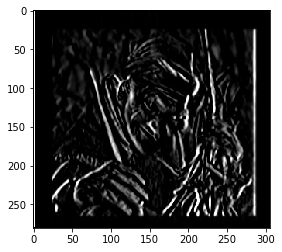

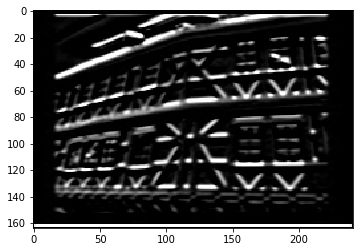

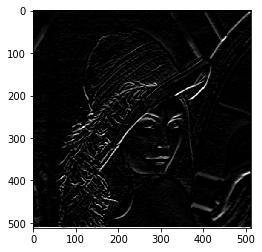

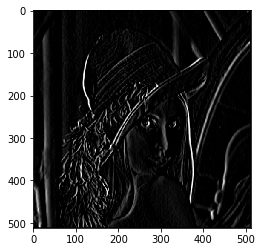

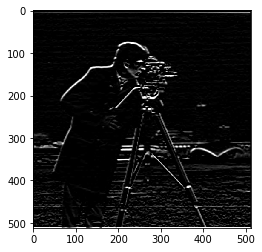

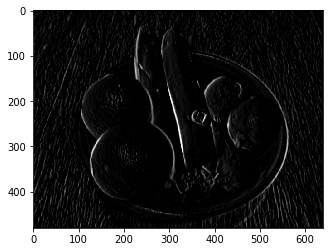

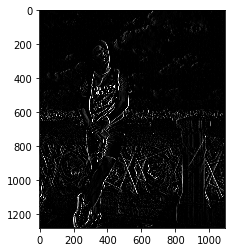

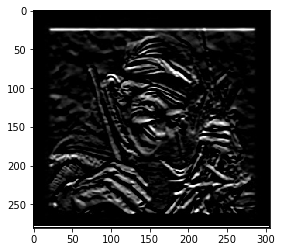

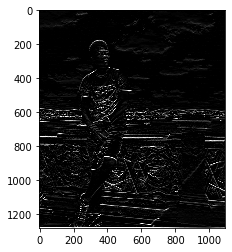

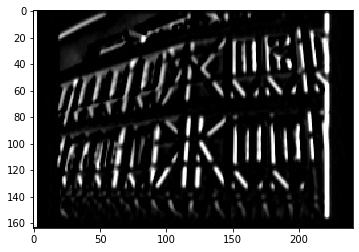

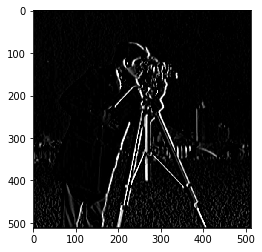

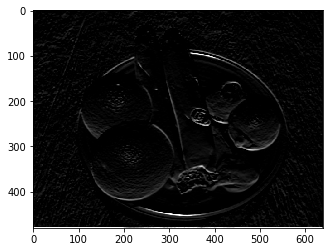

In [57]:

 
for img in glob.glob(path3 + str('/*.jpg')):
    plt.figure() , plt.imshow(cv2.imread(img))

    
#plt.figure(), plt.imshow(sobel[0] , cmap= plt.get_cmap('gray'));

# Non - Maximum Suppression.

In [58]:



def non_max_suppression(sobel):
    
    # sobel input is a vector with 4 matrices, sobel x and y-axis, the gradient intensity matrix  and their corresponding angle matrix
    # output is a matrix same size as input with brighter edges.
    
    I  = sobel[0]; # intensity matrix
    A = sobel[1]; # Angle matrix
    
    AD = A * 180 / np.pi ; # Normalize all angles to a range of 0 - 180 and 0 - -180 degrees
    
    # To solve the problem of negative angles in the angle matrix we add 180  to ge their corresponding counterparts in the positive domain
    
    AD[AD < 0] += 180; # add 180 to all negative angles
    
    out  = np.zeros(I.shape); # initialize the output image to alll zeros
    
    
    for i in range(I.shape[0] -1):
        for j in range(I.shape[1]-1):
            
            #x = I[i][j];
            t1  = 0 ; #variables to hold the neighboring pixel intensity values.
            t2 = 0;
            
            # 
            if  (np.any(0 <= AD[i][j]) and np.any(AD[i][j] < 22.5) or np.any(157.5 <= AD[i][j]) and np.any((AD[i][j] <= 180))): # -22.5 - 22.5 angles to the right of the pixel being processed
                
                t1 = I[i][j+1];
                t2 = I[i][j-1];
                
            elif  np.any(22.5 <= AD[i][j]) and np.any( AD[i][j]< 67.5) : #  Direction to the bottom-right and top-left of the pixel being processed
                
                t1 = I[i][j+1];
                t2 = I[i][j-1];
                
            elif  np.any(67.5 <= AD[i][j]) and np.any(AD[i][j] < 112.5) : # Direction  to the bottom and top of the pixel being processed
                
                t1 = I[i][j+1];
                t2 = I[i][j-1];
                
            elif  np.any(112.5 <= AD[i][j]) and np.any(AD[i][j] < 157.5) : # Direction to the top-right and bottom-left of the pixel being processed
                
                t1 = I[i][j+1];
                t2 = I[i][j-1];
                
            
            if np.any(I[i][j] >= t1) and np.any(I[i][j] >= t2): # Direction to the 
                
                out[i][j] = I[i][j];
                
            else:
                out[i][j] = 0; 
     
    return out;

                
              
                
            
            
        
    

# Output Of Non_Maximum Suppression.

In [59]:
# Getting output from the gradient filtering process.

sob_out = sobel_list ; # list consisting of all the images after the gradient operation has been performed.
                        # Each item in the list is a turple of with 4 items ( Gx , Gy , Gmagnitude , Angle)
    
non_max = []; #List to hold images after non maximum suppression  process. 

for img in sob_out:
    
    mag_angle = [img[2] , img[3]]; # For every image after gradient process, this list holds the magnitude and angle matrices.
    
    non_max.append(non_max_suppression(mag_angle)); # appends the output of the non_maximum supression process to the list;    

# Saving test-images to a folder for view later
for i in range(len(non_max)):
    cv2.imwrite(os.path.join(path4 , 'Non_max' + str(i+1) + '.jpg'), non_max[i]); # save non_max images to a folder


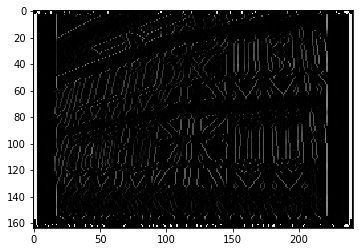

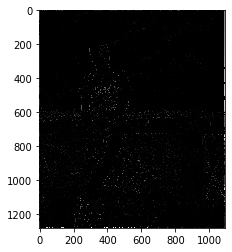

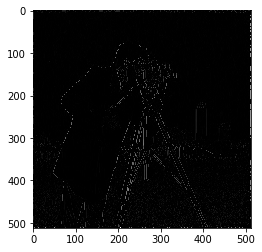

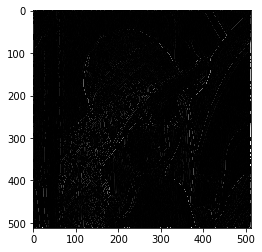

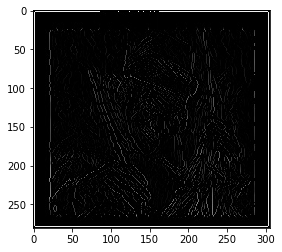

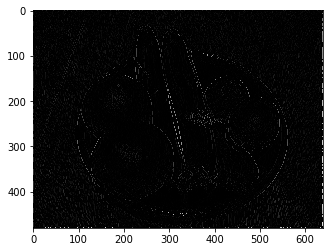

In [60]:
for img in glob.glob(path4 + str('/*.jpg')):
    plt.figure() , plt.imshow(cv2.imread(img))

# Double Thresholding.

In [61]:


def double_threshold(image , lowthres , highthres):
    # input image : format is a 2D matrix with intensity values 0 - 255
    # input (double) lowthres: specifies the low threshold coefficient
    # input (double) highthres specifies the high threshold coefficient
    # output: A turple consisting of 3 elements: 2D image with strong edge pixels above highthres enhance to 255, 
    # a strong_pix is a matrix same dimension as image containing all the 
    
    # Due to the fact that we will be testing our code with different images of different intensities its best to
    # set an intensity coefficient which varies with respect to the image intensity.
    img = image
    lt = image.max() * lowthres;
    ht = image.max() * highthres;
  #  lt = 50;
    #ht = 150;

    
    # vector or 1D array to hold all the pixel positions with strong edges
    #weak_pix = np.zeros(image.shape); # vector or 1D array to hold all the pixel positions with strong edges
    
    
    out  = np.zeros(image.shape);
    
    h = np.int32(255);
     
    #l = np.int32(30);
    
    #strong_pix = np.where(img >= ht); # two 1D arrays containing all indices in which the intensity is greater than or equal to 
    weak_pix = np.where((img >=lt) & (img < ht)); # two 1D arrays containing all indices in which the intensity less than the lower threshold
    
    
    for i in range(out.shape[0]):
        for j in range(out.shape[1]):
            
            #x = img[i][j]
            if np.any(img[i][j] >= ht) :
                img[i][j] = h; # set image pixels whose intensities are above high threshold to 255
                
            elif np.any(img[i][j] < lt):
                img[i][j] = 0; # set image pixels whose intensities are below low threshold to 0
              
            else:
                img[i][j] = img[i][j]
                
    return (img , weak_pix)
                
            
                
            
        
     
    
    
    
    
    
    

 # Testing the Double Threshold Function With Image inputs.

In [62]:
threshold_list = []; #list of all output images after double thresholding.

threshold_input = non_max ; # copy all output from the non-maximum suppression process to a new list
lt_coef = 0.01; 
ht_coef = 0.1; 

for i in range(len(threshold_input)):
        #threshold_list.append(double_threshold(threshold_input[i] , lt_coef , ht_coef));
        #cv2.imwrite(os.path.join(path5 + str('Dt') + str(i) + str('.jpg')),
         
        x = double_threshold(threshold_input[i] , lt_coef , ht_coef); # Double threshold all the images
        threshold_list.append(x) ; 
    
# Writing all double thresholded images to memory and saving to a folder
for i in range(len(threshold_list)):
    cv2.imwrite(os.path.join(path5 + str('/Dt') + str(i) + str('.jpg')) , threshold_list[i][0]);


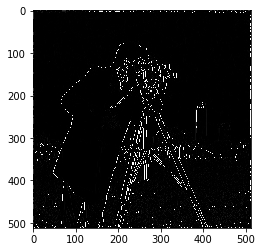

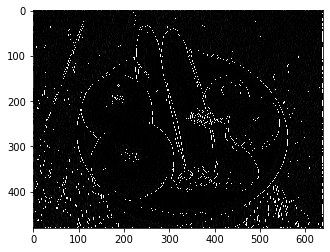

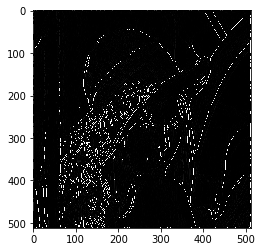

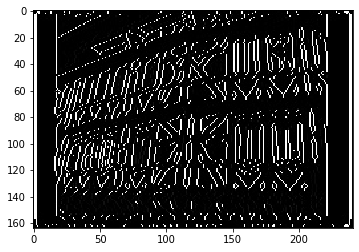

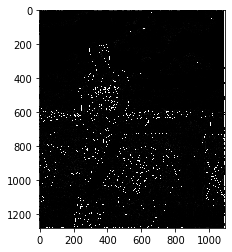

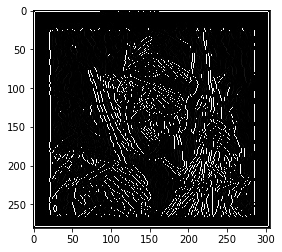

In [63]:
for img in glob.glob(path5 + str('/*.jpg')):
    plt.figure() , plt.imshow(cv2.imread(img))

# Hysterisis Algorithm For Edge Tracking.

In [64]:
# Output from the double thresholding is the input to the hysteris

def hysteresis(image , weak_pixel):
    # Input image : resulting image from double thresholding
    # Input weak_pixel: 2D matrix of the indices of all the weak pixels found between low and high threshold.
    wr = weak_pixel[0]; #  arrays or list of indices of weak pixels for each row in the image after double thresholding process
    wc = weak_pixel[1]; # arays of indices of weak pixels for each column in the image after double thresholding process
    high = 255;
    img = image;
    
   # for i in range(img.shape[0]):
       # for j in range(img.shape[1]):
            
    for k in range(len(wr) -1): # loops thru
        
        i = wr[k]; # indices of pixels in the row of image with weak pixels
        j = wc[k]  # indices of pixels in the column of the image with weak pixels
        #x  = img[i][j];

        if np.any(img[i-1][j] == high) or np.any(img[i-1][j+1] == high) or np.any(img[i-1][j-1] == high) or np.any(img[i][j-1] >= high) or np.any(img[i+1][j-1] >= high) or np.any(img[i+1][j] == high) or np.any(img[i+1][j+1] == high) or np.any(img[i][j+1] == high):
             img[i][j] = high;

        else:
             img[i][j] = 0;
                    
    return img;

                    

    
    
    

# Test For Final Edge Detection Using Hysteresis.

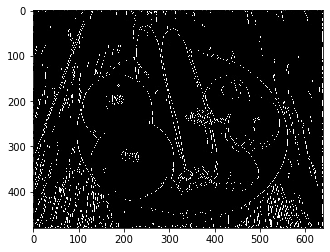

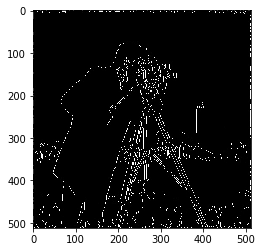

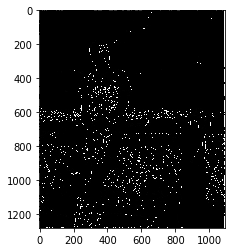

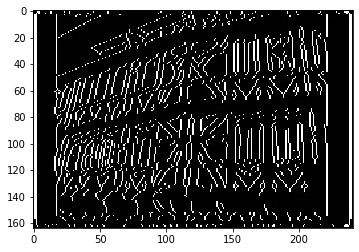

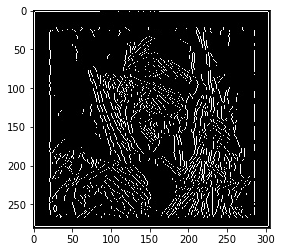

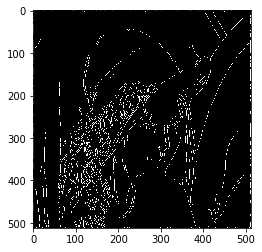

In [65]:
input_list = threshold_list ; #Each element in this list is a turple of 2. First element is the double thresholded image, 
                           #the  second is the 2D matrix of of the indices of weak pixels in the image.

canny_list = [];

for i in range(len(input_list)):
     
        canny = hysteresis(input_list[i][0] , input_list[i][1]);
        canny_list.append(canny) ;

for i in range(len(canny_list)):
    cv2.imwrite(os.path.join(path6 + str('/canny') + str(i) + str('.jpg')) , canny_list[i]);

read = [];

for item in glob.glob(path6 + str('/*.jpg')):
        plt.figure() , plt.imshow(cv2.imread(item))
#test3 = hysteresis(im , weak);

# Output With OpenCV Canny Edge Function.

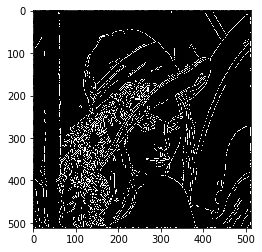

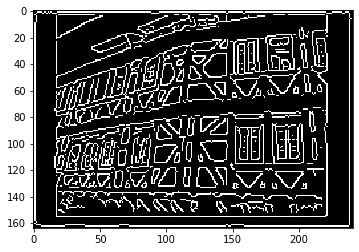

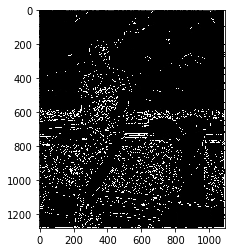

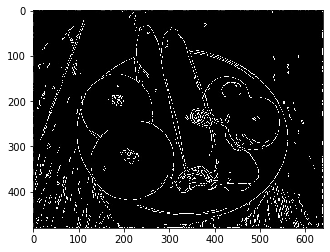

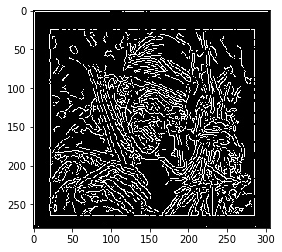

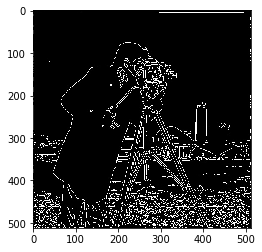

In [68]:

#Reading all the images.
real = [];
i = 0 ; 
for item in glob.glob(path2 + str('/*.jpg')):
    can  = cv2.Canny(cv2.imread(item) , 40 , 80);
    cv2.imwrite(os.path.join(path7 + str('/canny') + str(i) + str('.jpg')) , can )
    plt.figure() , plt.imshow(cv2.imread(path7 + str('/canny') + str(i) + str('.jpg')))
    i = i +1 ; 
#edges = cv2.Canny(blur, 20, 30)
#cv2.imwrite('can.jpg', edges)



# As far as a ratio of low_threshold to high_threshold, John Canny himself recommended a low to high ratio of 1:2 or 1:3.

## Apply Canny using the OpenCV as well and compare the results

Comparison of Results With the OpenCV Canny Fu

